<a href="https://colab.research.google.com/github/Isaacfer49/TextsInSpanish/blob/main/TopicsSpanishTexts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocesamiento de textos.


Instalación de bibliotecas.

In [ ]:
!pip install textblob
!pip install -U textblob-fr


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 561.2/561.2 kB 2.7 MB/s eta 0:00:00


In [ ]:
!pip install nltk
!pip install nltk spacy
!pip install torch

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl.metadata (1.8 kB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinu

In [ ]:
!python -m spacy download es_core_news_sm



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 31.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import numpy as np
import pandas as pd
import os
import zipfile
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
zip_path = '/content/Textos Limpios-20240610T201600Z-001.zip'
extract_to = '/content'

try:
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)
    print("Extraction complete.")
except FileNotFoundError:
    print("The specified ZIP file does not exist.")
except zipfile.BadZipFile:
    print("The specified file is not a ZIP file or it is corrupted.")


Extraction complete.


## Digitalización y Limpieza.

Cada texto lo transformaremos y los pasaremos a un diccionario. Para cada uno realizaremos la limpieza de datos pertinente.


In [ ]:
# Directory containing the text files
directory = '/content/Textos Limpios'

# Dictionary to hold filename and content
textos = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.txt'):
        file_path = os.path.join(directory, filename)

        try:
            # Attempt to open the file with UTF-8
            with open(file_path, 'r', encoding='utf-8') as file:
                data = file.read()
        except UnicodeDecodeError:
            # If UTF-8 fails, try a different encoding, e.g., ISO-8859-1
            with open(file_path, 'r', encoding='ISO-8859-1') as file:
                data = file.read()

        # Use the filename as the key and the file content as the value
        textos[filename] = data





In [ ]:
# Convert dictionary keys to a list and access by index
keys_list = list(textos.keys())
print(keys_list[0])

Causa Contra el General Leonardo Marquez - Garcia G.txt


In [ ]:
textos_no_pre = textos.copy()

In [ ]:
textos['Juventud en Viena - Arthur Schnitzler.txt']

'PRIMER LIBRO\nDE MAYO DE 1862 A MAYO DE 1875\n\n\nVine al mundo en Viena el 15 de mayo de 1862, en la Praterstrasse, que por entonces se llamaba Jägerzeile, en el tercer piso de la casa que limita con el hotel Europa, y, a las pocas horas \x97mi padre me lo ha contado muchas veces\x97, me tumbaron un rato sobre su escritorio. Ya no recuerdo si fue el ama de cría o mi propio padre quien me adjudicó aquel, con todo, inusual acomodo para un recién nacido; a él, en cualquier caso, el hecho le dio pie una y otra vez a vaticinar en broma que, lógicamente, haría carrera como escritor; vaticinio que, por cierto, no habría de ver cumplido más que en un grado modesto y jamás con entera satisfacción.\nLa familia de mi padre era oriunda de Gross-Kanisza, una ciudad mediana de Hungría; parece ser que originariamente se apellidaba Zimmermann, pero en la época de mi abuelo adoptó el nombre de Schnitzler, o le fue impuesto por una alta instancia. Mi abuela, Rosalie, era hija de un tal David Klein de 

De manera preeliminar, al hacer la transformación a txts, encontramos caracteres especiales con los cuales lidearemos en nuestra limoieza "/n", "\x86" etc. Además, al tratarse de español también es neceario lidear con acentos y tildes.

Para la preparación de los textos seguiremos el siguiente pipeline:



1. Convertir el texto a minúsculas: Esto ayuda a mantener la consistencia ya que "Hola" y "hola" deben ser tratados de la misma manera en el análisis.
2. Eliminar puntuación y caracteres especiales: La puntuación a menudo puede ser irrelevante para el análisis de sentimientos.
3. Eliminar palabras vacías: Estas son palabras comunes que pueden no contribuir al sentimiento, como "y", "el", etc.
4. Tokenización: Dividir el texto en palabras o tokens.
5. Lematización/Conjugación: Reducir las palabras a su forma base o raíz.



In [ ]:
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer


nltk.download('wordnet')


lemmatizer = WordNetLemmatizer()

# Stopwords set
stop_words = set(stopwords.words('spanish'))




def clean_text(text):
    # Lowercase text
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Tokenize text
    tokens = word_tokenize(text)

    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Update dictionary with cleaned text
for filename in textos:
    data = textos[filename]
    # Clean the data
    cleaned_data = clean_text(data)
    # Update the dictionary with cleaned data
    textos[filename] = cleaned_data




[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
textos['Juventud en Viena - Arthur Schnitzler.txt']

'primer libro mayo 1862 mayo 1875 vine mundo viena 15 mayo 1862 praterstrasse entonces llamaba jägerzeile tercer piso casa limita hotel europa pocas horas \x97mi padre contado muchas veces\x97 tumbaron rato escritorio recuerdo si ama cría propio padre adjudicó aquel inusual acomodo recién nacido cualquier caso hecho dio pie vez vaticinar broma lógicamente haría carrera escritor vaticinio cierto ver cumplido grado modesto jamás enteron satisfacción familia padre oriunda grosskanisza ciudad mediana hungría parece ser originariamente apellidaba zimmermann época abuelo adoptó nombre schnitzler impuesto alta instancia abuela rosalie hija tal david klein puszta kovacsi palatinado zala esposa marie soltera rechnitz rama paterna árbol genealógico puedo remontarme atrás abuelo carpintero \x97como visto antecesores inmediatos\x97 vivió junto siempre condiciones humildes menesterosas incluso final carta envió padre pocos días después nacimiento leía deseo « nieto trajera abuelo dicha tan inmiseri

Aún tenemos un problema con el caracter "\x97" (representa un guion largo), vamos a removerlo. Redefinimos ```clean_text``` y volvemos a correrlo.



In [ ]:
def clean_text(text):

    text = text.replace('\x97', '—')

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))
    #Tokenizamos el text
    tokens = word_tokenize(text)
    # Quitamos stop words y lematizamos
    cleaned_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(cleaned_tokens)

# Creamos el diccionario con text limpio
for filename in textos:
    data = textos[filename]

    cleaned_data = clean_text(data)

    textos[filename] = cleaned_data

In [ ]:
textos['Juventud en Viena - Arthur Schnitzler.txt']

'primer libro mayo 1862 mayo 1875 vine mundo viena 15 mayo 1862 praterstrasse entonces llamaba jägerzeile tercer piso casa limita hotel europa pocas horas —mi padre contado muchas veces— tumbaron rato escritorio recuerdo si ama cría propio padre adjudicó aquel inusual acomodo recién nacido cualquier caso hecho dio pie vez vaticinar broma lógicamente haría carrera escritor vaticinio cierto ver cumplido grado modesto jamás enteron satisfacción familia padre oriunda grosskanisza ciudad mediana hungría parece ser originariamente apellidaba zimmermann época abuelo adoptó nombre schnitzler impuesto alta instancia abuela rosalie hija tal david klein puszta kovacsi palatinado zala esposa marie soltera rechnitz rama paterna árbol genealógico puedo remontarme atrás abuelo carpintero —como visto antecesores inmediatos— vivió junto siempre condiciones humildes menesterosas incluso final carta envió padre pocos días después nacimiento leía deseo « nieto trajera abuelo dicha tan inmisericordemente d

El texto da oportunidad de que se pudea profundizar mas en el preprocesamiento, aunque eso no necesariamente podria aumentar la precisión de nuestro análisis de sentimiento.

Especialmente para caracteres especiales que no aporten significado.


## Minado de tópicos (1st Improvement)

In [ ]:
textos[list(textos.keys())[0]]

'documentos inéditos raros historia méxico publicados genaro garcía causa gral márquez orden ministerio guerra mandando procesar general don leonardo márquez « actos desobediencia insubordinación demás hechos aparece responsable general jefe primer cuerpo ejército » acompaña lista 21 documentos deben servir proceso diciembre 11 1859 comunicada comandante general 14 general don luis martínez nombrado fiscal 1 orden general márquez encargándole mando primer cuerpo ejército compuesto tropas jalisco san luis guanajuato aguascalientes querétaro batallón zapadores salga campaña facultándolo « tome providencias juzgue oportunas exterminar rebeldes interior » previénesele encargue gobierno comandancia general departamento jefe confianza córdoba marzo 2 1859 2 contestación general márquez dando gracias pidiendo recursos cumplir guadalajara marzo 11 1859 3 oficio general don luis tapia avisando haber salido campaña general márquez quedar encargado comandancia guadalajara mayo 30 1859 4 oficio ge

In [ ]:

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

texts = textos
# Extracting the text content
documents = list(texts.values())

# Vectorize the documents using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

# Perform LSA using SVD
svd = TruncatedSVD(n_components=2)
X_svd = svd.fit_transform(X)

# Create a DataFrame to see the LSA results
lsa_df = pd.DataFrame(X_svd, index=texts.keys(), columns=['Component 1', 'Component 2'])

print("LSA Results:")
print(lsa_df)

# Optional: Print terms and their importance in each component
terms = vectorizer.get_feature_names_out()
for i, comp in enumerate(svd.components_):
    terms_in_comp = zip(terms, comp)
    sorted_terms = sorted(terms_in_comp, key=lambda x: x[1], reverse=True)
    print(f"\nComponent {i + 1} terms and their importance:")
    for term, weight in sorted_terms[:10]:  # Top 10 terms
        print(f"{term}: {weight:.4f}")


LSA Results:
                                                    Component 1  Component 2
Causa Contra el General Leonardo Marquez - Garc...     0.424078    -0.403502
En la ruta de la onda - Parmenides Garcia Salda...     0.257303    -0.185060
Mexico Insurgente - John Reed.txt                      0.700428     0.468117
Recuerdos intimos de la guerra del Pacifico - A...     0.722399     0.415748
Memorias - Roman Polanski.txt                          0.645824     0.455026
La playa bajo la calle - Mckenzie Wark.txt             0.292843    -0.221309
Fray Gregorio de la Concepcion - Fray Gregorio ...     0.609028     0.411281
Antes de que Anochezca - Reinaldo Arenas.txt           0.507954    -0.338433
Diario en Bolivia - Ernesto Che Guevara.txt            0.551829     0.329706
Cartas de un norte americano - Servando Teresa ...     0.536329     0.245003
Diario de Campaña durante la guerra civil españ...     0.267719    -0.183672
Diario de campo en Melanesia - B. Malinowski.txt       0.358293

In [ ]:
# Create a DataFrame to see the document-topic matrix
document_topic_matrix = pd.DataFrame(X_svd, index=texts.keys(), columns=['Topic 1', 'Topic 2'])

print("Document-Topic Matrix:")
print(document_topic_matrix)



Document-Topic Matrix:
                                                     Topic 1   Topic 2
Causa Contra el General Leonardo Marquez - Garc...  0.424078 -0.403502
En la ruta de la onda - Parmenides Garcia Salda...  0.257303 -0.185060
Mexico Insurgente - John Reed.txt                   0.700428  0.468117
Recuerdos intimos de la guerra del Pacifico - A...  0.722399  0.415748
Memorias - Roman Polanski.txt                       0.645824  0.455026
La playa bajo la calle - Mckenzie Wark.txt          0.292843 -0.221309
Fray Gregorio de la Concepcion - Fray Gregorio ...  0.609028  0.411281
Antes de que Anochezca - Reinaldo Arenas.txt        0.507954 -0.338433
Diario en Bolivia - Ernesto Che Guevara.txt         0.551829  0.329706
Cartas de un norte americano - Servando Teresa ...  0.536329  0.245003
Diario de Campaña durante la guerra civil españ...  0.267719 -0.183672
Diario de campo en Melanesia - B. Malinowski.txt    0.358293 -0.220237
Memorias de un soldado cubano - Dariel Alarcon ...  0.

## Minado de tópicos (2nd improvement)

In [ ]:
from sklearn.datasets import fetch_20newsgroups
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True)


In [ ]:
type(X_train)

list

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import re
tokenizer = RegexpTokenizer(r'\b\w+\b')
stop_words = list(set(stopwords.words("spanish")))
stop_words += list(string.punctuation)

# Uncomment and run the 3 lines below if you haven't got these packages already
# nltk.download('stopwords')
# nltk.download('punkt')
# nltk.download('wordnet')


In [ ]:
X_train[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

In [ ]:
t_texts = list(textos.values())

In [ ]:
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words=stop_words,
                        tokenizer=tokenizer.tokenize,
                        max_df=0.2,
                        min_df=0.02
                       )
tfidf_train_sparse = tfidf.fit_transform(t_texts)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(),
                        columns=tfidf.get_feature_names_out())
tfidf_train_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0  000  007  008  010  012  038   05  050  060  ...  útero  útilmente  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0        0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0        0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0        0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0        0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...    0.0        0.0   

   útima  úvula    ü  über  überwundener  üke  ündmmming   ﬁn  
0    0.0    0.0  0.0   0.0           0.0  0.0        0.0  0.0  
1    0.0    0.0  0.0   0.0           0.0  0.0        0.0  0.0  
2    0.0    0.0  0.0   0.0           0.0  0.0        0.0  0.0  
3    0.0    0.0  0.0   0.0           0.0  0.0        0.0  0.0  
4    0.0    0.0  0.0   0.0           0.0  0.0        0.0  0.0  

[5 rows x 100824 columns]

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_obj = TruncatedSVD(n_components=20, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T

In [ ]:
import seaborn as sns

<Axes: >

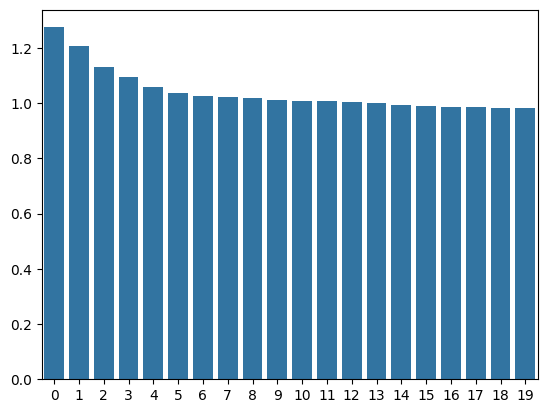

In [ ]:
sns.barplot(x=list(range(len(Sigma))), y = Sigma)

In [ ]:

lsa_term_topic = (lsa_obj.components_).T
eda_train_columns = tfidf_train_df.columns

# Create the term_topic_matrix
term_topic_matrix = pd.DataFrame(data=lsa_term_topic,
                                 index = eda_train_columns,
                                 columns = [f'Latent_concept_{r}' for r in range(0, V_T.shape[1])])

In [ ]:
term_topic_matrix.head()

Latent_concept_0  Latent_concept_1  Latent_concept_2  Latent_concept_3  \
0            0.002734          0.000405          0.000751          0.004173   
000          0.044422         -0.016972         -0.017715          0.024009   
007          0.000498          0.000289         -0.000022          0.000361   
008          0.000651         -0.000132          0.000288          0.001096   
010          0.000651         -0.000132          0.000288          0.001096   

     Latent_concept_4  Latent_concept_5  Latent_concept_6  Latent_concept_7  \
0           -0.000231         -0.001472         -0.001656         -0.000162   
000          0.117724          0.025897          0.010786         -0.039399   
007          0.001235         -0.000449         -0.000450         -0.000538   
008          0.000503         -0.001235         -0.000401          0.000396   
010          0.000503         -0.001235         -0.000401          0.000396   

     Latent_concept_8  Latent_concept_9  Latent_concept_10  Latent_concept_11  \
0            0.000927          0.001319           0.000496           0.001304   
000         -0.007629         -0.042240          -0.012313          -0.062401   
007          0.000257         -0.001284          -0.000440          -0.001512   
008          0.000135          0.001298           0.000219           0.000107   
010          0.000135          0.001298           0.000219           0.000107   

     Latent_concept_12  Latent_concept_13  Latent_concept_14  \
0            -0.000104          -0.001159           0.000466   
000          -0.015568           0.038111          -0.039285   
007          -0.000918           0.001024          -0.000886   
008           0.000113          -0.000680          -0.000105   
010           0.000113          -0.000680          -0.000105   

     Latent_concept_15  Latent_concept_16  Latent_concept_17  \
0            -0.000288          -0.000255          -0.000813   
000          -0.019592           0.004892           0.004679   
007           0.000049           0.000252           0.000072   
008          -0.000102           0.000202           0.000460   
010          -0.000102           0.000202           0.000460   

     Latent_concept_18  Latent_concept_19  
0            -0.003217          -0.000164  
000          -0.038601          -0.049197  
007          -0.000506          -0.000869  
008          -0.000761          -0.000330  
010          -0.000761          -0.000330

<ipython-input-30-d4b4ac711d9c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
<ipython-input-30-d4b4ac711d9c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-30-d4b4ac711d9c>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
<ipython-input-30-d4b4ac711d9c>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-30-d4b4ac711d9c>:12: FutureWarning: 

Passing `palette` without ass

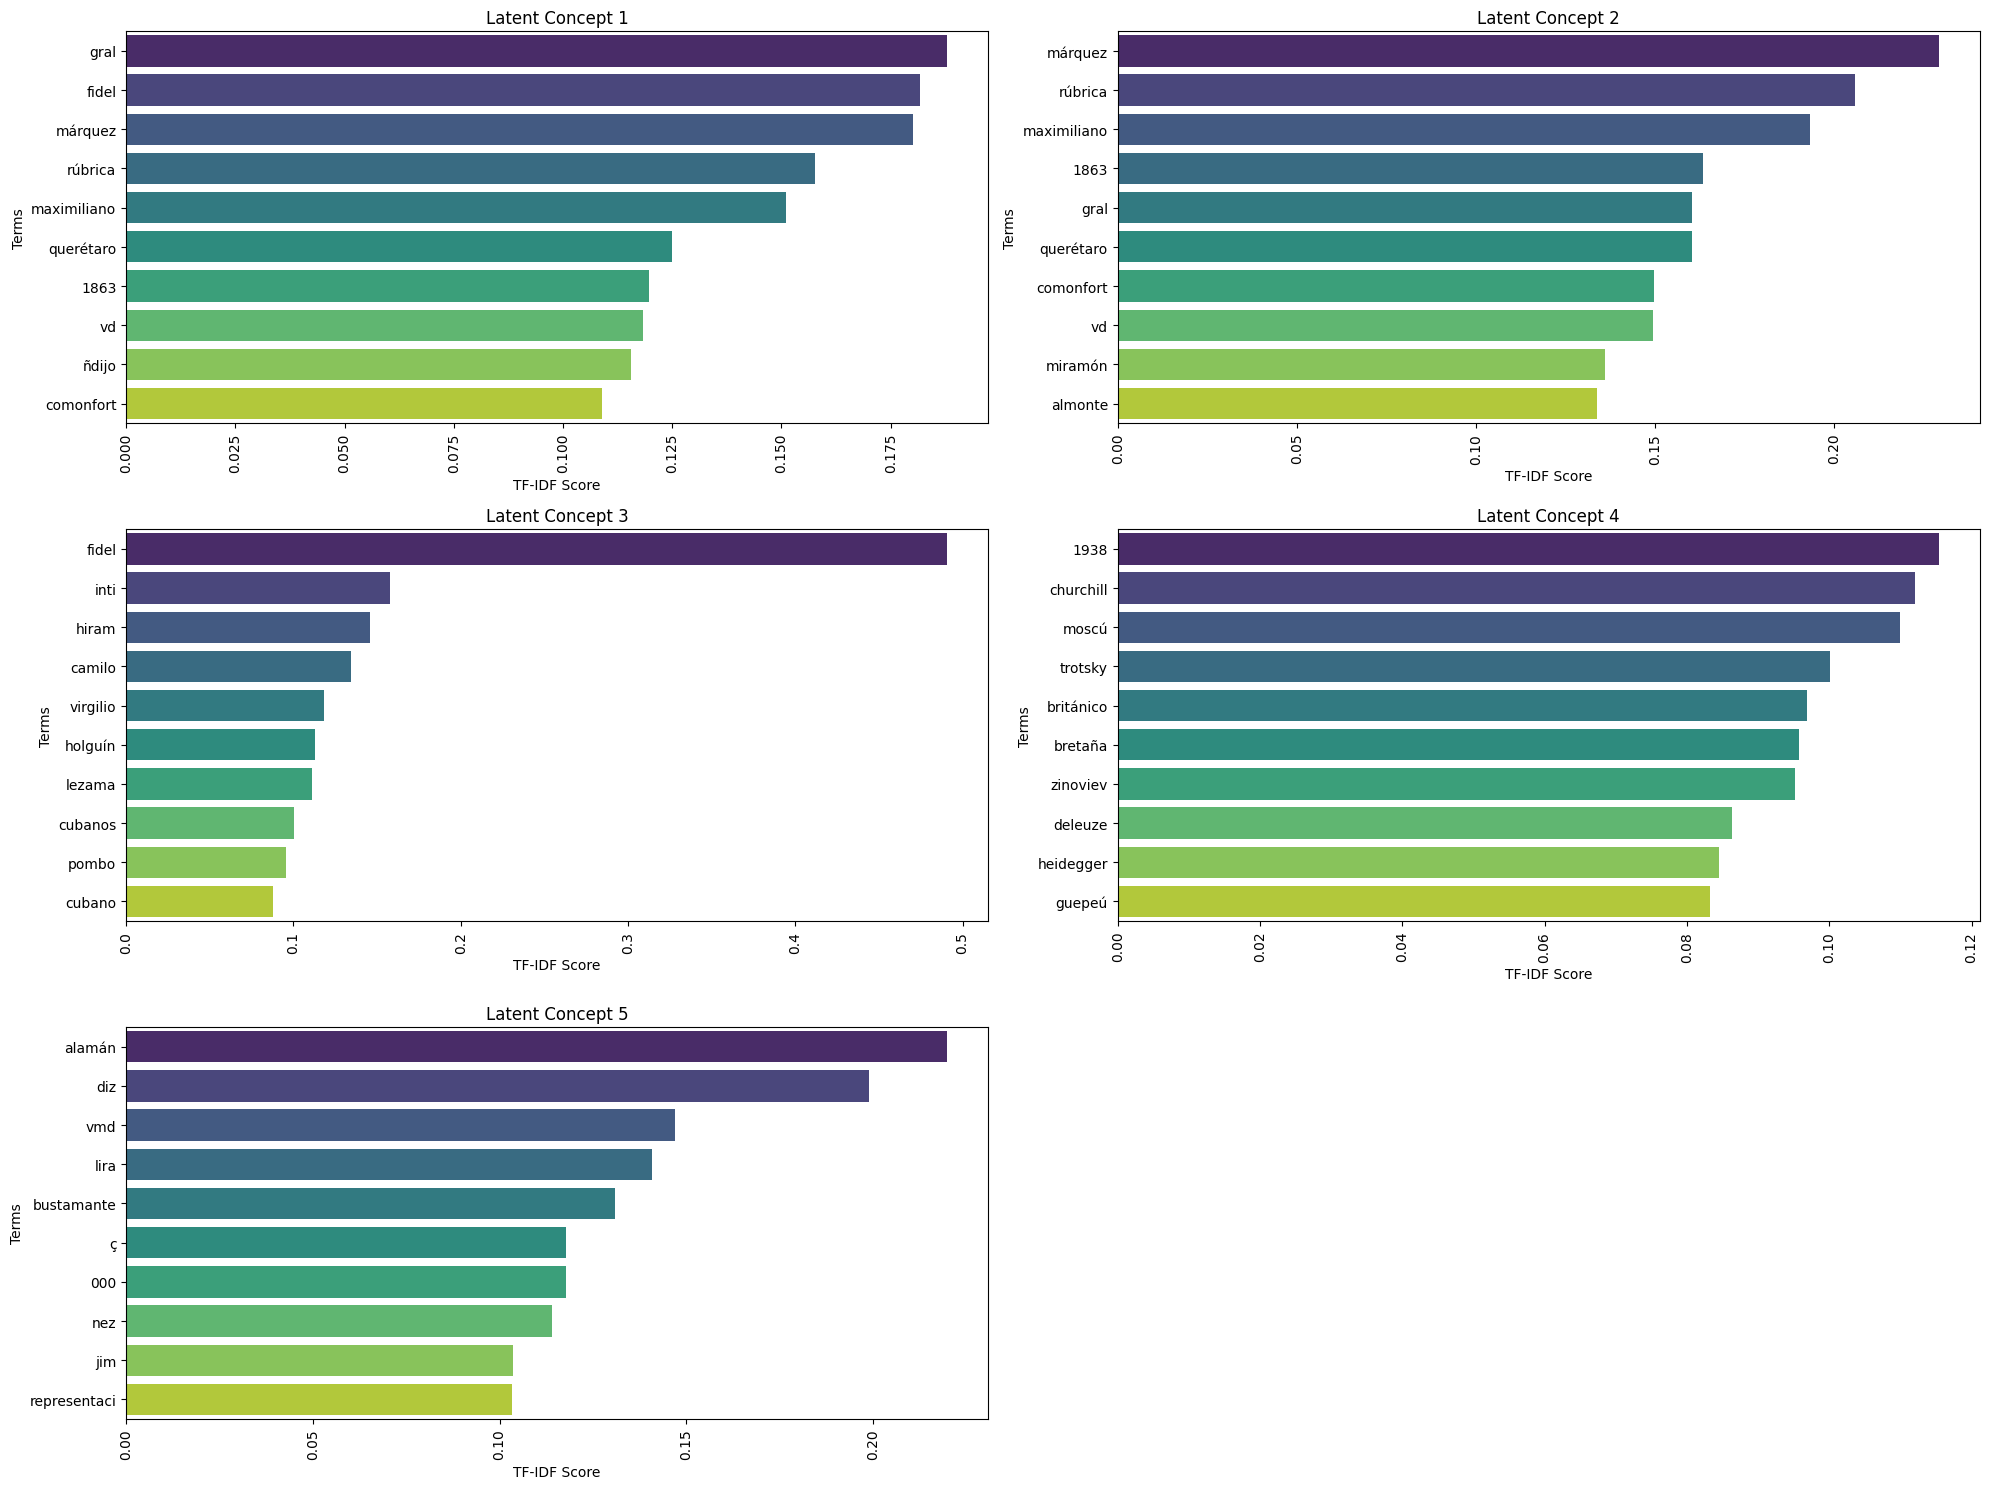

In [ ]:

num_concepts_to_plot = 5  # Se plotearán los conceptos latentes del 0 al 4, etiquetados como 1 a 5

fig, axs = plt.subplots(3, 2, figsize=(20, 15))  # 3 filas y 2 columnas

# Aseguramos que solo se llenen los primeros 5 subplots
for i in range(num_concepts_to_plot):
    data = term_topic_matrix[f'Latent_concept_{i}']
    data = data.sort_values(ascending=False)
    top_10 = data[:10]
    ax = axs[i//2, i%2]  # Accedemos al subplot correcto en el grid
    sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
    ax.set_title(f'Latent Concept {i+1}')
    ax.set_xlabel('TF-IDF Score')
    ax.set_ylabel('Terms')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Eliminar el subplot vacío si hay
if num_concepts_to_plot < 6:
    fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.savefig('latent_concepts.png')  # Guardamos la imagen
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-31-36c2ac982481>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
<ipython-input-31-36c2ac982481>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-31-36c2ac982481>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
<ipython-input-31-36c2ac982481>:37: UserWarning: FixedFormatt

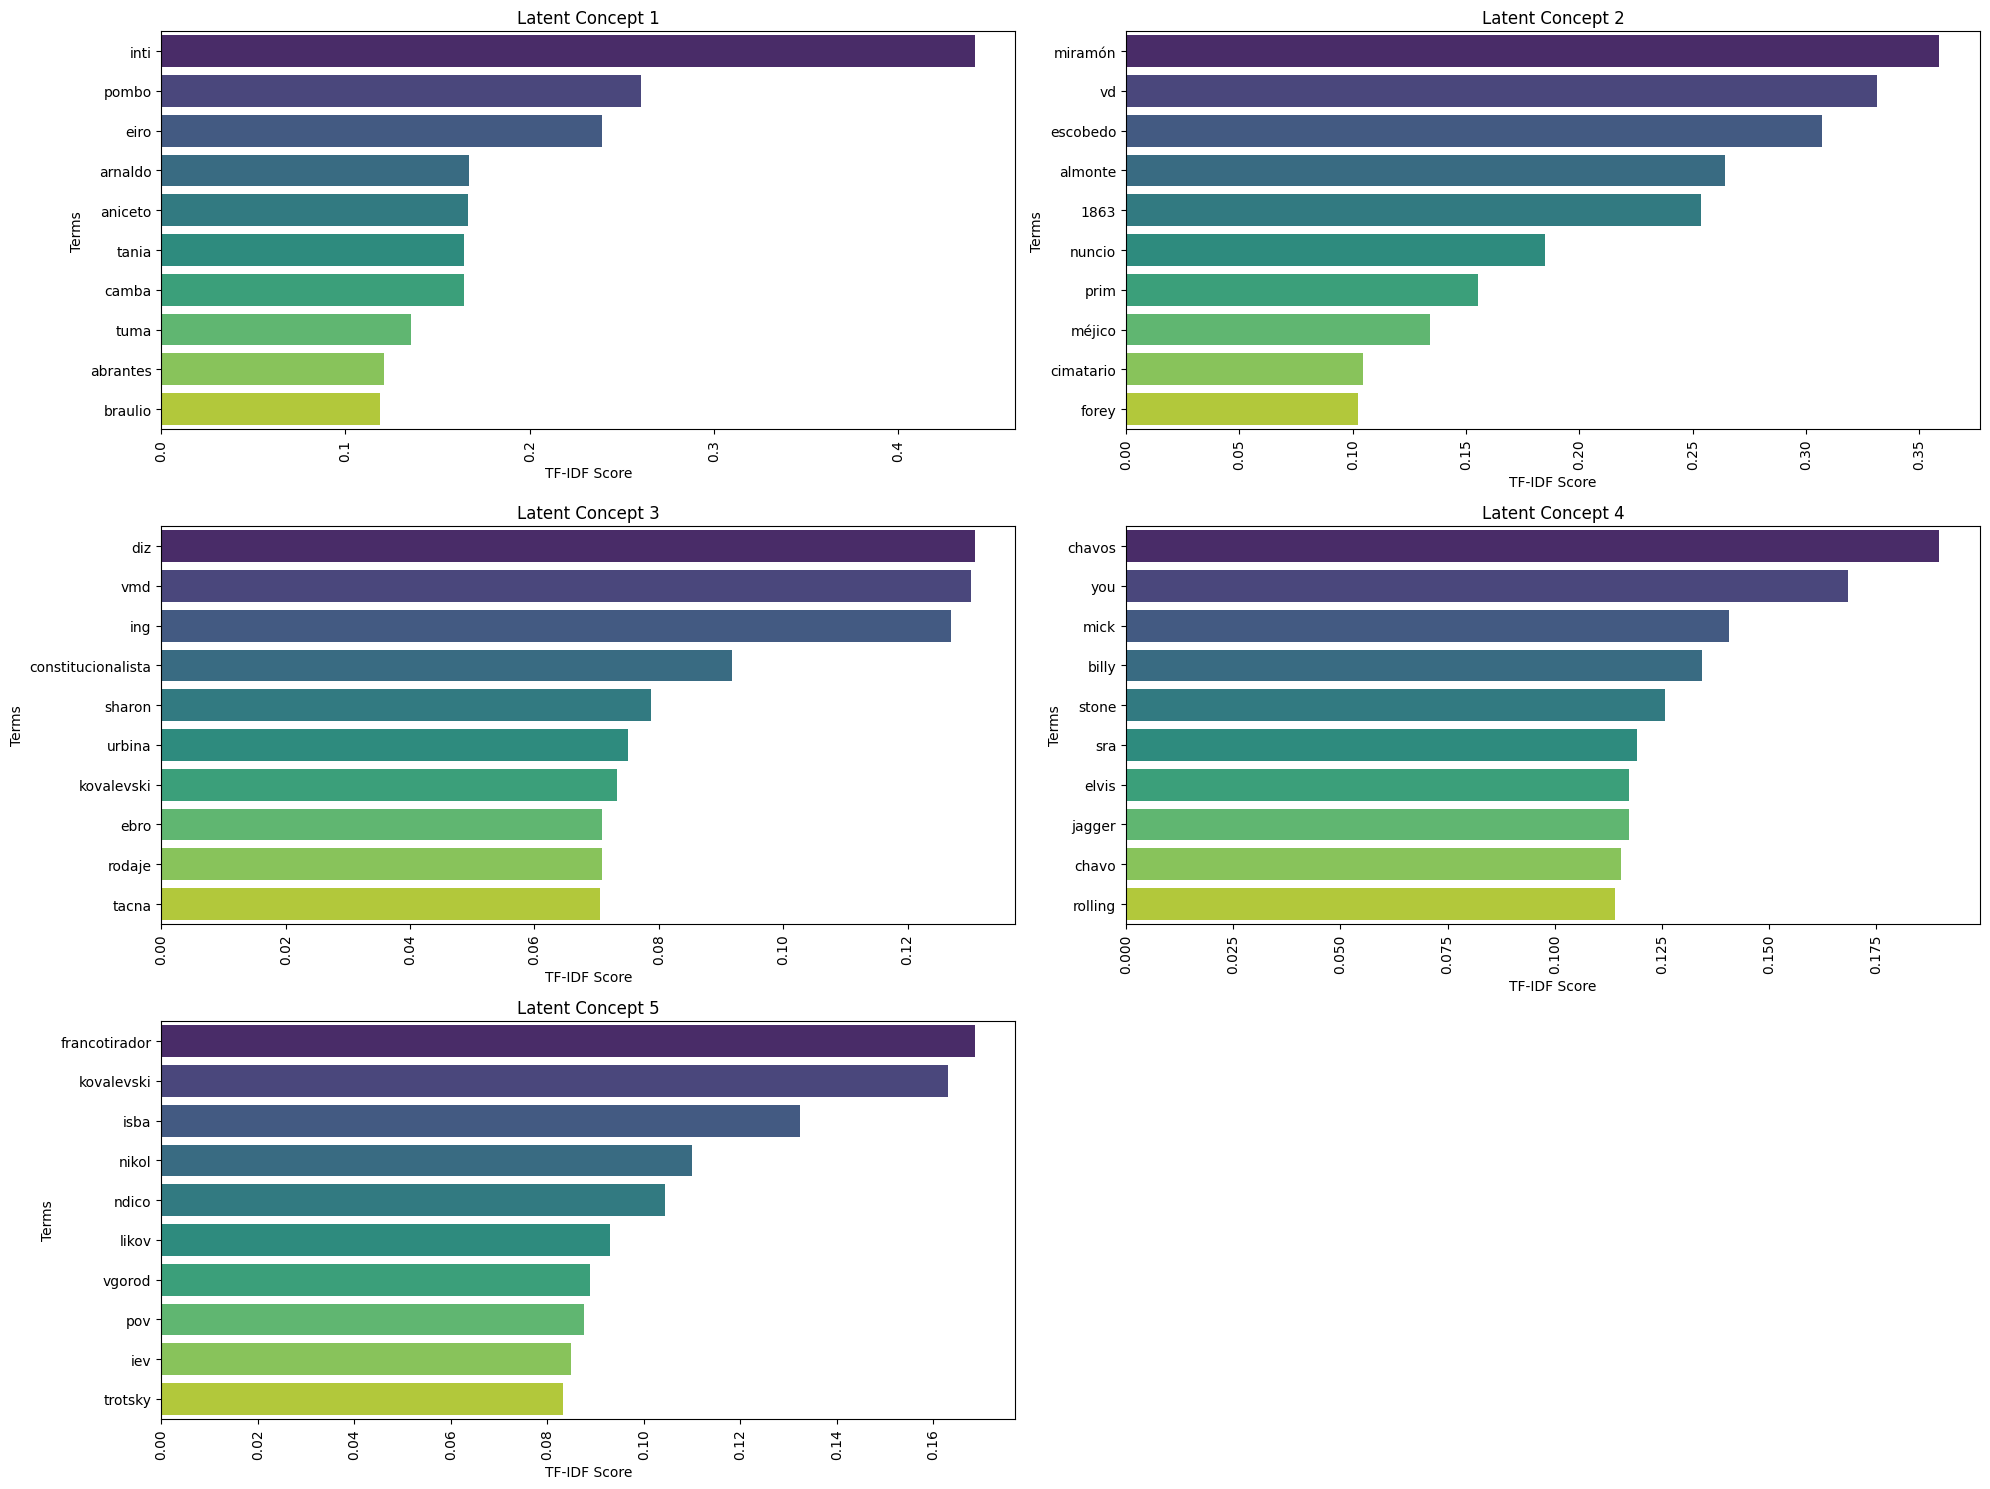

In [ ]:
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words=stop_words,
                        tokenizer=tokenizer.tokenize,
                        max_df=0.1,
                        min_df=0.01
                       )
tfidf_train_sparse = tfidf.fit_transform(t_texts)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(),
                        columns=tfidf.get_feature_names_out())
tfidf_train_df.head()
lsa_obj = TruncatedSVD(n_components=20, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T
lsa_term_topic = (lsa_obj.components_).T
eda_train_columns = tfidf_train_df.columns

# Create the term_topic_matrix
term_topic_matrix = pd.DataFrame(data=lsa_term_topic,
                                 index = eda_train_columns,
                                 columns = [f'Latent_concept_{r}' for r in range(0, V_T.shape[1])])
# Plotting the latent concepts
num_concepts_to_plot = 5  # Se plotearán los conceptos latentes del 0 al 4, etiquetados como 1 a 5

fig, axs = plt.subplots(3, 2, figsize=(20, 15))  # 3 filas y 2 columnas

# Aseguramos que solo se llenen los primeros 5 subplots
for i in range(num_concepts_to_plot):
    data = term_topic_matrix[f'Latent_concept_{i}']
    data = data.sort_values(ascending=False)
    top_10 = data[:10]
    ax = axs[i//2, i%2]  # Accedemos al subplot correcto en el grid
    sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
    ax.set_title(f'Latent Concept {i+1}')
    ax.set_xlabel('TF-IDF Score')
    ax.set_ylabel('Terms')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Eliminar el subplot vacío si hay
if num_concepts_to_plot < 6:
    fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.savefig('latent_concepts_2.png')  # Guardamos la imagen
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
<ipython-input-32-311cc093db5b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
<ipython-input-32-311cc093db5b>:37: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
<ipython-input-32-311cc093db5b>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
<ipython-input-32-311cc093db5b>:37: UserWarning: FixedFormatt

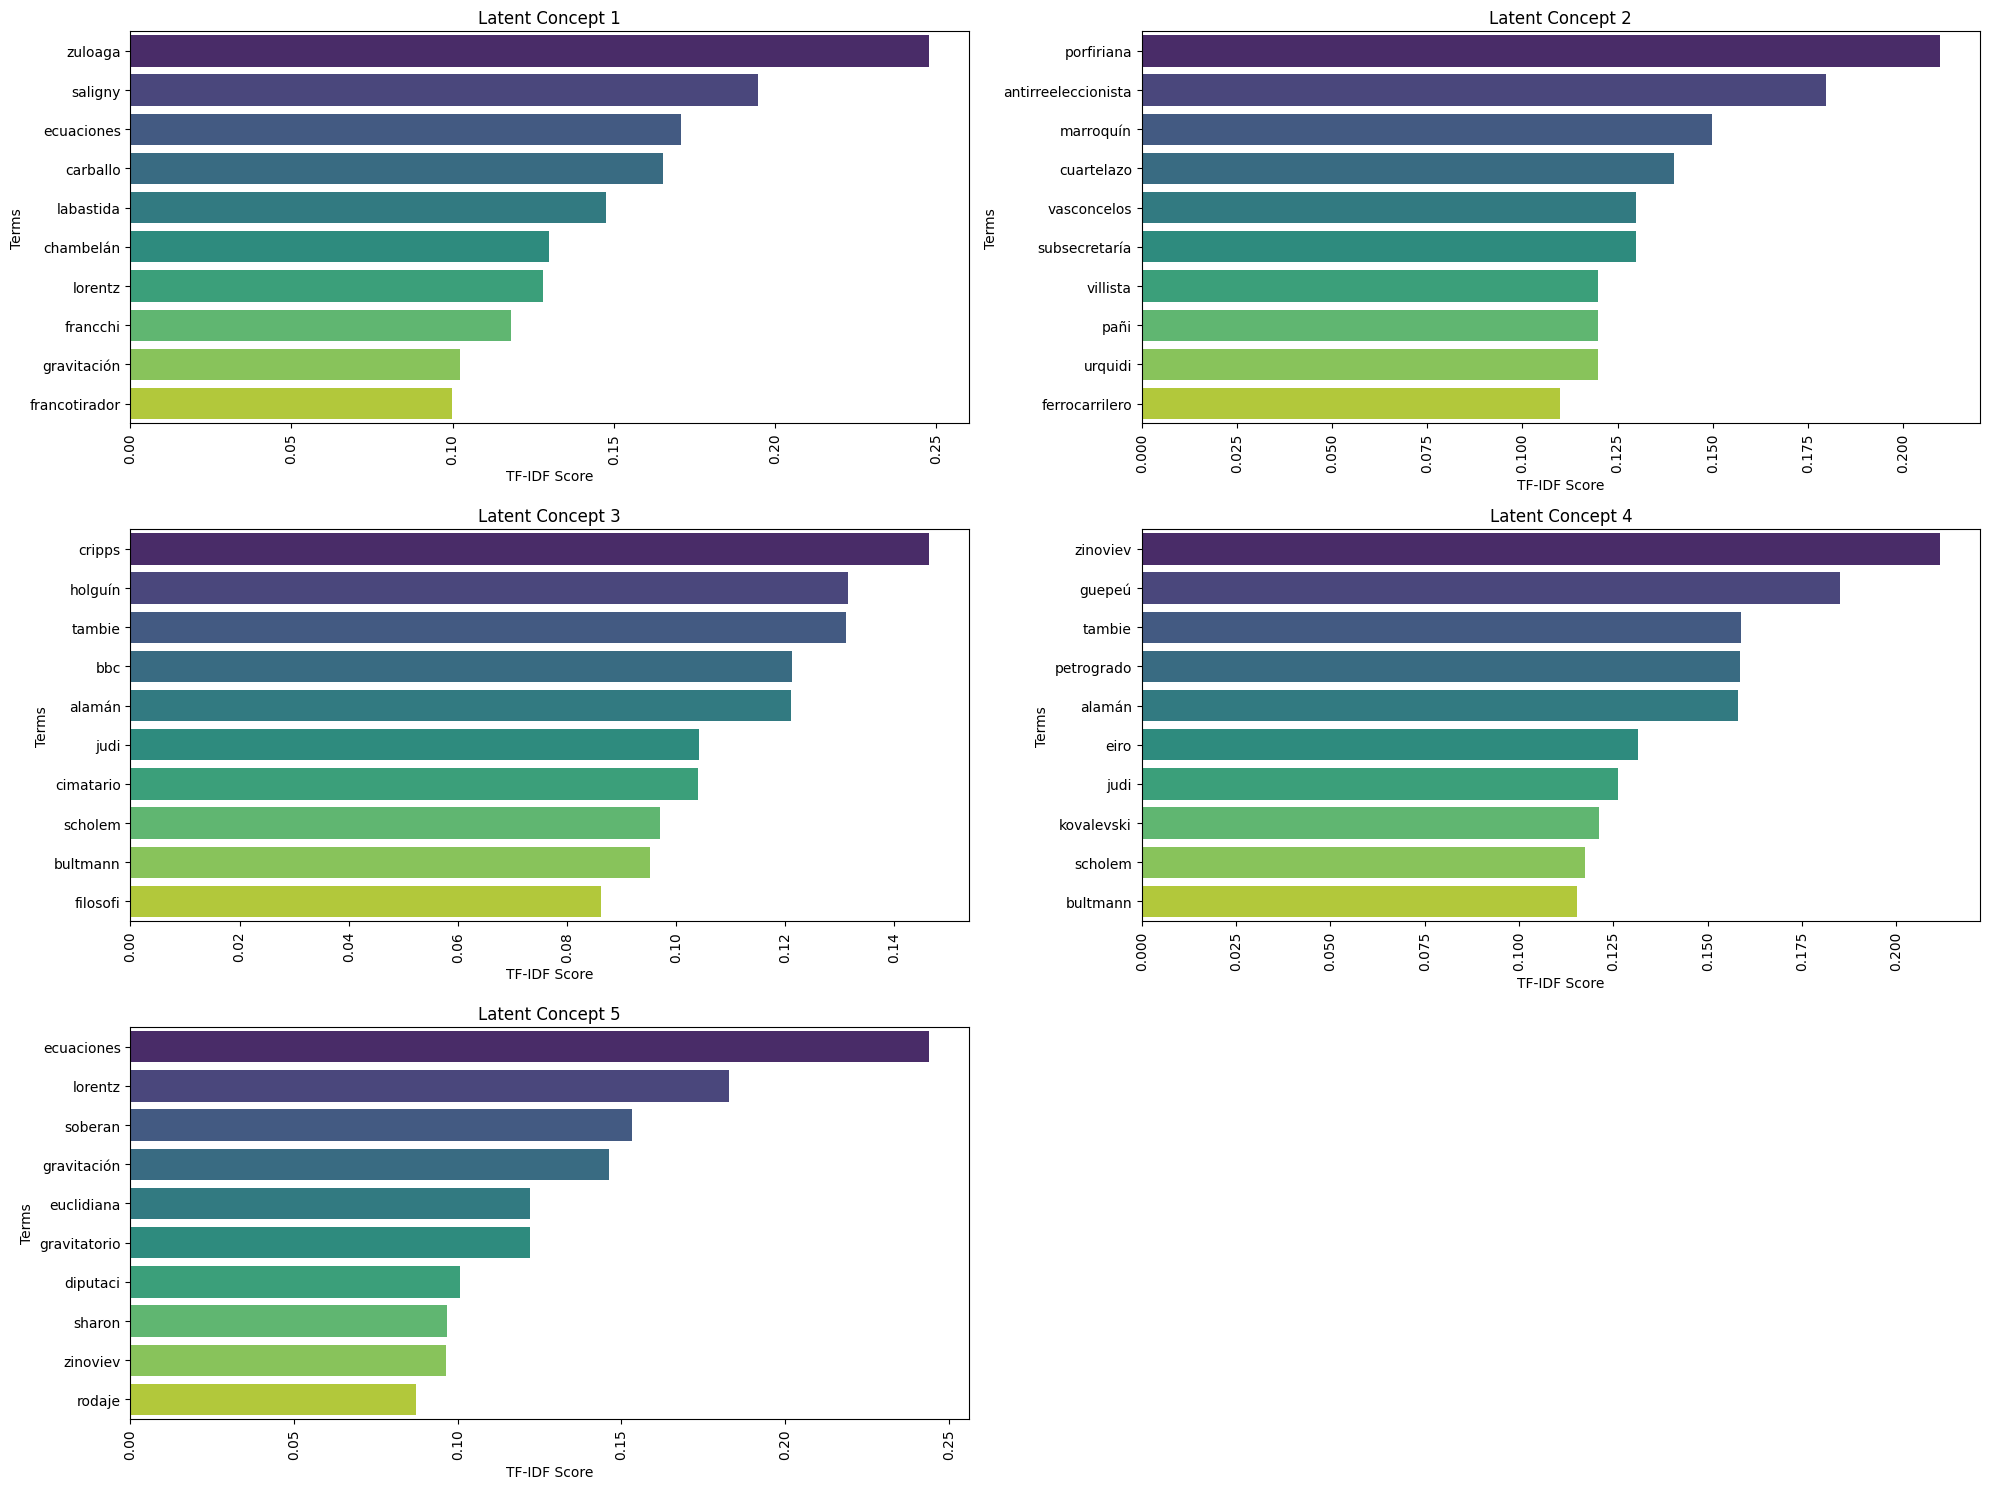

In [ ]:
tfidf = TfidfVectorizer(lowercase=True,
                        stop_words=stop_words,
                        tokenizer=tokenizer.tokenize,
                        max_df=0.05,
                        min_df=0.01
                       )
tfidf_train_sparse = tfidf.fit_transform(t_texts)
tfidf_train_df = pd.DataFrame(tfidf_train_sparse.toarray(),
                        columns=tfidf.get_feature_names_out())
tfidf_train_df.head()
lsa_obj = TruncatedSVD(n_components=20, n_iter=100, random_state=42)
tfidf_lsa_data = lsa_obj.fit_transform(tfidf_train_df)
Sigma = lsa_obj.singular_values_
V_T = lsa_obj.components_.T
lsa_term_topic = (lsa_obj.components_).T
eda_train_columns = tfidf_train_df.columns

# Create the term_topic_matrix
term_topic_matrix = pd.DataFrame(data=lsa_term_topic,
                                 index = eda_train_columns,
                                 columns = [f'Latent_concept_{r}' for r in range(0, V_T.shape[1])])
# Plotting the latent concepts
num_concepts_to_plot = 5  # Se plotearán los conceptos latentes del 0 al 4, etiquetados como 1 a 5

fig, axs = plt.subplots(3, 2, figsize=(20, 15))  # 3 filas y 2 columnas

# Aseguramos que solo se llenen los primeros 5 subplots
for i in range(num_concepts_to_plot):
    data = term_topic_matrix[f'Latent_concept_{i}']
    data = data.sort_values(ascending=False)
    top_10 = data[:10]
    ax = axs[i//2, i%2]  # Accedemos al subplot correcto en el grid
    sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
    ax.set_title(f'Latent Concept {i+1}')
    ax.set_xlabel('TF-IDF Score')
    ax.set_ylabel('Terms')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

# Eliminar el subplot vacío si hay
if num_concepts_to_plot < 6:
    fig.delaxes(axs[2, 1])

plt.tight_layout()
plt.savefig('latent_concepts_3.png')  # Guardamos la imagen
plt.show()

# Gráficas

In [ ]:
pip install text2graphapi

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 431.4/431.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.5/61.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 7.9 MB/s eta 0:00:00
  Created wheel for flashtext: filename=flashtext-2.7-py2.py3-none-any.whl size=9297 sha256=6b11c8b30780c1e5cb6dc886b6cda6bf175e1578bfdac258fb2fa9c45d03530f
  Stored in directory: /root/.cache/pip/wheels/bc/be/39/c37ad168eb2ff644c9685f52554440372129450f0b8ed203dd
Successfully built flashtext


In [ ]:
# # The input has to be a list of dictionaries, where eacgh dict conatins an 'id' and 'doc' text data

# from text2graphapi.src.Cooccurrence import Cooccurrence
# from text2graphapi.src.Heterogeneous import Heterogeneous
# from text2graphapi.src.IntegratedSyntacticGraph import ISG
# corpus_docs = [
#     {'id': 1, 'doc': "The sun was shining, making the river look bright and happy."},
#     {'id': 2, 'doc': "Even with the rain, the sun came out a bit, making the wet river shine."}]

# to_word_coocc_graph = Cooccurrence(graph_type = 'DiGraph',
#         language = 'en',
#         window_size = 3, output_format = 'adj_matrix')

# to_hetero_graph = Heterogeneous(graph_type = 'Graph',
#         window_size = 20,
#         language = 'en', output_format = 'networkx')

# to_isg_graph = ISG(graph_type = 'DiGraph',  language = 'en',
#        output_format = 'networkx')

# to_hetero_graph.transform(corpus_docs)
# to_word_coocc_graph.transform(corpus_docs)
# to_isg_graph.transform(corpus_docs)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
DEBUG:text2graphapi.src.Utils:Import libraries/modules from :PROD
INFO:text2graphapi.src.Preprocessing:Has already installed spacy model en_core_web_sm
INFO:text2graphapi.src.Preprocessing:Has already installed spacy model en_core_web_sm
INFO:text2graphapi.src.Preprocessing:Has already installed spacy model en_core_web_sm
INFO:text2graphapi.src.Heterogeneous:Init transformations: Text to Heterogeneous Graph
INFO:text2graphapi.src.Heterogeneous:Transforming 2 text documents...
INFO:text2graphapi.src.Heterogeneous:Done transformations
INFO:text2graphapi.src.Cooccurrence:Init transformations: Text to Co-Ocurrence Graph
INFO:text2graphapi.src.Cooccurrence:Transforming 2 text documents...
INFO:text2graphapi.src.Cooccurrence:Done transformations
INFO:text2graphapi.src.I

[{'doc_id': 1,
  'graph': <networkx.classes.digraph.DiGraph at 0x7c5cd4e29b70>,
  'number_of_edges': 26,
  'number_of_nodes': 20,
  'status': 'success'}]

In [ ]:
# Transforming the dictionary
corpus_docs = [{'id': key, 'doc': value} for key, value in textos.items()]

In [ ]:
to_word_coocc_graph = Cooccurrence(graph_type = 'DiGraph',
        language = 'sp',
        window_size = 3, output_format = 'adj_matrix')

INFO:text2graphapi.src.Preprocessing:Has already installed spacy model es_core_news_sm


In [ ]:
to_cooccurrence_graph = Cooccurrence(
                graph_type = 'DiGraph', # Graph, DiGraph
                apply_prep = True,
                parallel_exec = False,
                window_size = 4,
                language = 'sp', # sp, en, fr
                output_format = 'networkx', # networkx, adj_matrix
                steps_preprocessing = { }
            )

INFO:text2graphapi.src.Preprocessing:Has already installed spacy model es_core_news_sm


In [ ]:

output_cocc_text_graphs = to_cooccurrence_graph.transform(corpus_docs)


INFO:text2graphapi.src.Cooccurrence:Init transformations: Text to Co-Ocurrence Graph
INFO:text2graphapi.src.Cooccurrence:Transforming 35 text documents...
INFO:text2graphapi.src.Cooccurrence:Done transformations


('documentos in ditos raros historia m xico publicados genaro garc causa gral '
 'm rquez orden ministerio guerra mandando procesar general don leonardo m '
 'rquez actos desobediencia insubordinaci n dem s hechos aparece responsable '
 'general jefe cuerpo ej rcito acompa lista documentos servir proceso '
 'diciembre comunicada comandante general general don luis mart nez nombrado '
 'fiscal orden general m rquez encarg ndole mando cuerpo ej rcito compuesto '
 'tropas jalisco san luis guanajuato aguascalientes quer taro batall n '
 'zapadores salga campa facult ndolo tome providencias juzgue oportunas '
 'exterminar rebeldes interior previ nesele encargue gobierno comandancia '
 'general departamento jefe confianza c rdoba marzo contestaci n general m '
 'rquez dando gracias pidiendo recursos cumplir guadalajara marzo oficio '
 'general don luis tapia avisando salido campa general m rquez quedar '
 'encargado comandancia guadalajara mayo oficio general m rquez ministerio '
 'avis ndol

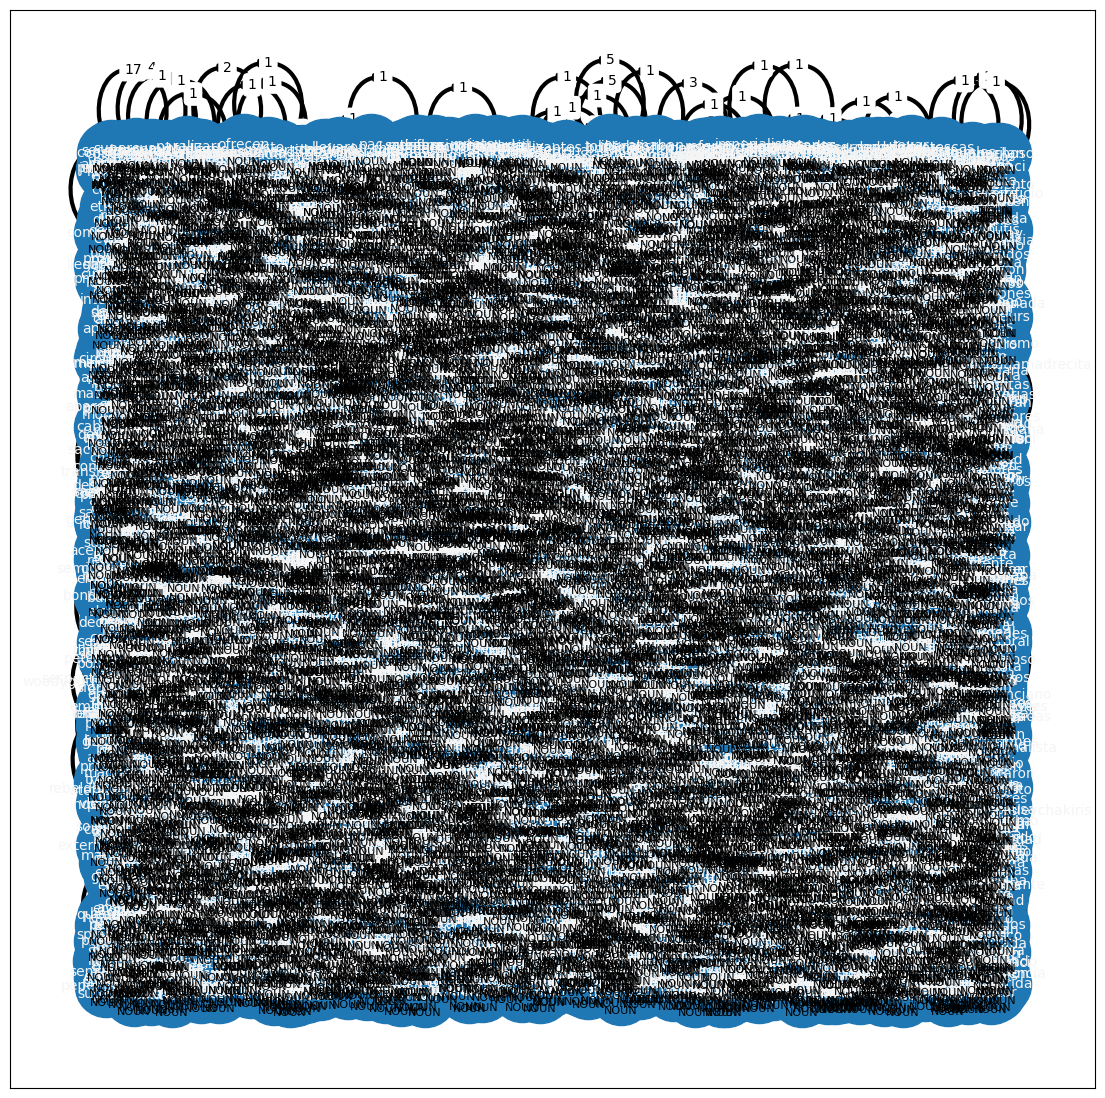

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pprint import pprint

pprint(corpus_docs[0]['doc'])

G = output_cocc_text_graphs[1]['graph']
options = {
    'node_color': 'tab:blue',
    'node_size': 2000,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 8,

}

#labels = nx.get_node_attributes(G, 'pos_tag')
pos = nx.random_layout(G)
plt.figure(4,figsize=(14,14))

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 0.02)

node_attrs = nx.get_node_attributes(G, 'pos_tag')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = attr

edge_labels = nx.get_edge_attributes(G,'freq')

nx.draw_networkx(G, pos, arrows=True, with_labels=True, font_size='10', font_color="whitesmoke", **options)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs, font_size='8')
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()

In [ ]:
to_cooccurrence_graph = Cooccurrence(
                graph_type = 'DiGraph', # Graph, DiGraph
                apply_prep = True,
                parallel_exec = False,
                window_size = 4,
                language = 'sp', # sp, en, fr
                output_format = 'networkx', # networkx, adj_matrix
                steps_preprocessing = { }
            )
output_cocc_text_graphs = to_cooccurrence_graph.transform(corpus_docs)
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import numpy as np
from pprint import pprint

pprint(corpus_docs[0]['doc'])

G = output_cocc_text_graphs[1]['graph']
options = {
    'node_color': 'tab:blue',
    'node_size': 2000,
    'width': 3,
    'arrowstyle': '-|>',
    'arrowsize': 8,

}

#labels = nx.get_node_attributes(G, 'pos_tag')
pos = nx.random_layout(G)
plt.figure(4,figsize=(14,14))

pos_attrs = {}
for node, coords in pos.items():
    pos_attrs[node] = (coords[0], coords[1] - 0.02)

node_attrs = nx.get_node_attributes(G, 'pos_tag')
custom_node_attrs = {}
for node, attr in node_attrs.items():
    custom_node_attrs[node] = attr

edge_labels = nx.get_edge_attributes(G,'freq')

nx.draw_networkx(G, pos, arrows=True, with_labels=True, font_size='10', font_color="whitesmoke", **options)
nx.draw_networkx_labels(G, pos_attrs, labels=custom_node_attrs, font_size='8')
nx.draw_networkx_edge_labels(G, pos, edge_labels)

plt.show()


INFO:text2graphapi.src.Preprocessing:Has already installed spacy model es_core_news_sm
INFO:text2graphapi.src.Cooccurrence:Init transformations: Text to Co-Ocurrence Graph
INFO:text2graphapi.src.Cooccurrence:Transforming 35 text documents...


In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# Create a layout for the nodes
pos = nx.spring_layout(G, seed=42)  # Use spring layout for better spacing

# Customize node colors based on their attributes
node_colors = ['tab:blue' if attr == 'NOUN' else 'tab:green' for node, attr in nx.get_node_attributes(G, 'pos_tag').items()]

# Customize edge thickness based on frequency
edge_weights = [G[u][v]['freq'] for u, v in G.edges()]

# Draw the graph with the new layout and customizations
plt.figure(figsize=(14, 14))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, node_size=2000)
nx.draw_networkx_edges(G, pos, width=edge_weights, arrowstyle='-|>', arrowsize=8, edge_color='tab:gray')
nx.draw_networkx_labels(G, pos, font_size=10, font_color='whitesmoke')

# Draw edge labels with frequencies
edge_labels = nx.get_edge_attributes(G, 'freq')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='tab:red', font_size=8)

plt.title("Co-occurrence Graph", fontsize=16)
plt.axis('off')  # Turn off the axis
plt.show()
